# Trace Estimator  
https://doi.org/10.1016/0377-0427(96)00018-0 
## b) Algorithm 1 with Gauss-Radau quadrature

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
#for part e)
from matrices import * 
import time 
from scipy.linalg import block_diag
from helpers import *

In [2]:
#the Poisson matrix
k=12
A= Poisson_function(k=k)
n=k**2
print("n=",n)
u = np.zeros(n)
u[4] = 1
u = np.random.randn(n)
def f(x):
    return 1/x
    
tol = 1e-5
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [U,L]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

n= 144
bounds [U,L]= [65.25109683 65.25078188]
exact value: 65.2509696756944
L<I_ex: True
U>I_ex: True
L<U = True


In [3]:
#the Pei matrix
n=120
A=Pei_function(alpha=5, n=n)
def f(x):
    return 1/x
#notice that in python Z=1/A outputs Z[i,j]=1/A[i,j] which isn't what we want but! With the way our algorithm is define
#and the way it makes computations it doesn't matter


u = np.zeros(n)
u[1] = 1
#u = np.random.randn(n)
tol = 1e-3
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [U,L]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

a= 0.0001
b= 125.0
bounds [U,L]= [0.1984 0.1984]
exact value: 0.19840000000000016
L<I_ex: True
U>I_ex: False
L<U = False


In [4]:
n = 5
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

vec1 = -1*np.ones(n-1)
vec2 = 2*np.ones(n)
vec3 = -1*np.ones(n-1)
A = tridiag(vec1, vec2, vec3)

u = np.zeros(n)
u[1] = 1
# u = np.random.randn(n)
tol = 1e-2
L = algorithm_1(A=A, u=u, function=f, maxit=200, epsilon=tol)

print("bounds [L, U]=", L)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(A).dot(u))
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

a= 0.0001
b= 4.0
bounds [L, U]= [1.33333333 1.33333333]
exact value: 1.333333333333333
L<I_ex: False
U>I_ex: True
L<U = False


## d) Algorithm 2 

In [2]:
#the Poisson matrix
k=12
A= Poisson_function(k=k)
n=k**2
print("n=",n)
def f(x):
    return 1/x
tol = 1e-5
L = algorithm_2(A=A, m=50, p=0.9, function=f, epsilon=tol)

print("bounds [U,L]=", L)

I_ex=np.trace(np.linalg.inv(A))

print("exact value of trace of the inverse:", I_ex, 'found estimated value:', L[2], 'difference in two norm', np.linalg.norm(I_ex-L[2]))

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

n= 144
bounds [U,L]= (74.06462047283121, 54.332567550191555, 64.19859401151137)
exact value of trace of the inverse: 65.60090633777952 found estimated value: 64.19859401151137 difference in two norm 1.4023123262681452
L<I_ex: True
U>I_ex: True
L<U = True


In [3]:
#the Pei matrix
n=120
A=Pei_function(alpha=5, n=n)

def f(x):
    return 1/x
tol = 1e-5
L = algorithm_2(A=A, m=50, p=0.9, function=f, epsilon=tol)

print("bounds [U,L]=", L)

I_ex=np.trace(np.linalg.inv(A))

print("exact value of trace of the inverse:", I_ex, 'found estimated value:', L[2], 'difference in two norm', np.linalg.norm(I_ex-L[2]))

# check 
print("L<I_ex:", L[1]<I_ex )
print("U>I_ex:", L[0]>I_ex )
print("L<U =", L[1]<L[0] )

bounds [U,L]= (26.19928262891829, 21.478157371081732, 23.838720000000013)
exact value of trace of the inverse: 23.808 found estimated value: 23.838720000000013 difference in two norm 0.03072000000001296
L<I_ex: True
U>I_ex: True
L<U = True


## e) Numerical experiments

In [ ]:
def f(x):
    return 1/x

tol = 1e-5

### Example 1: the heat flow matrix

In [18]:
N=10 #in the paper they use n=900 but as we didn't save the matrix in sparse format we have a memory over run
      #I first did it with n=100 but the computation time was too long 
nu=0.2 
heat_flow_matrix=heat_flow_function(nu,N)
n=heat_flow_matrix.shape[0]
heat_flow_running_time=np.zeros(4)
heat_flow_trace_value=np.zeros(4)
heat_flow_matrix

array([[ 1.8, -0.2,  0. , ...,  0. ,  0. ,  0. ],
       [-0.2,  1.8, -0.2, ...,  0. ,  0. ,  0. ],
       [ 0. , -0.2,  1.8, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  1.8, -0.2,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.2,  1.8, -0.2],
       [ 0. ,  0. ,  0. , ...,  0. , -0.2,  1.8]])

In [19]:
#running time of algo 2

start=time.time()
L=algorithm_2(heat_flow_matrix,m=int(n/2),p=0.5, function=f, epsilon=tol) #for some m,p to tune 
execution_algo_2=time.time()-start 

heat_flow_running_time[0]=execution_algo_2
heat_flow_trace_value[0]=L[2]

In [20]:
#running time using built in numpy functions
start=time.time()
Tr_A_inv=np.trace(np.linalg.inv(heat_flow_matrix))
execution_built_in=time.time()-start 
heat_flow_running_time[1]=execution_built_in
heat_flow_trace_value[1]=Tr_A_inv

In [21]:
#running time using n linear systems

start=time.time()

Tr_A_inv=0

for i in range (n):
    e=np.zeros(n)
    e[i]=1
    Tr_A_inv+=e.T@np.linalg.solve(heat_flow_matrix,e)

execution_linear=time.time()-start
heat_flow_running_time[2]=execution_linear
heat_flow_trace_value[2]=Tr_A_inv
    

In [22]:
#using algorithm 1
start=time.time()

Tr_A_inv=0

for i in range (n):
    e=np.zeros(n)
    e[i]=1
    Tr_A_inv+=algorithm_1(heat_flow_matrix,e,function=f, maxit=50, epsilon=1e-05)

execution_algo_1=time.time()-start
heat_flow_running_time[3]=execution_algo_1
heat_flow_trace_value[3]=(Tr_A_inv[0]+Tr_A_inv[1])/2

Text(0.5, 1.0, 'Running time differences')

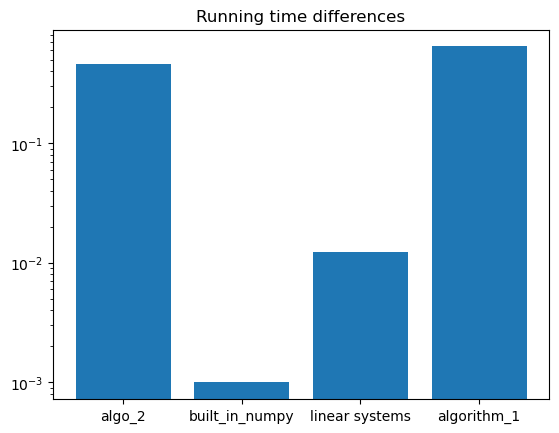

In [26]:
plt.bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], heat_flow_running_time)
plt.yscale('log')
plt.title('Running time differences')

Text(0.5, 1.0, 'values computed')

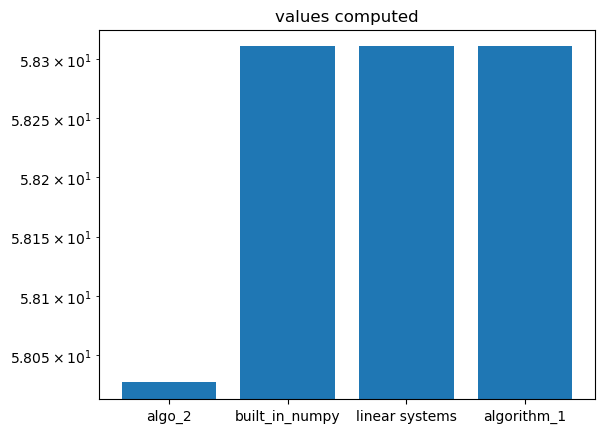

In [27]:
plt.bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], heat_flow_trace_value)
plt.yscale('log')
plt.title('values computed')

### example 2: the VFH matrix

In [47]:
VFH_matrix=-VFH_function(2) #issue!! For n=1,2 we need to do -VFH to have positive definite and for n>2 we need to find 
#another criterion than the eigenvalues as its eigenvalues are complex :( 

n=VFH_matrix.shape[0]
VFH_matrix_running_time=np.zeros(4)
VFH_matrix_trace_value=np.zeros(4)

In [48]:
#running time of algo 2

start=time.time()
L=algorithm_2(VFH_matrix,m=int(n/2),p=0.5, function=f, epsilon=tol) #for some m,p to tune 
execution_algo_2=time.time()-start 

VFH_matrix_running_time[0]=execution_algo_2
VFH_matrix_trace_value[0]=L[2]

In [49]:
#running time using built in numpy functions
start=time.time()
Tr_A_inv=np.trace(np.linalg.inv(VFH_matrix))
execution_built_in=time.time()-start 
VFH_matrix_running_time[1]=execution_built_in
VFH_matrix_trace_value[1]=Tr_A_inv

In [50]:
#running time using n linear systems

start=time.time()

Tr_A_inv=0

for i in range (n):
    e=np.zeros(n)
    e[i]=1
    Tr_A_inv+=e.T@np.linalg.solve(VFH_matrix,e)

execution_linear=time.time()-start
VFH_matrix_running_time[2]=execution_linear
VFH_matrix_trace_value[2]=Tr_A_inv
    

In [51]:
#using algorithm 1
start=time.time()

Tr_A_inv=0

for i in range (n):
    e=np.zeros(n)
    e[i]=1
    Tr_A_inv+=algorithm_1(VFH_matrix,e,function=f, maxit=50, epsilon=1e-05)

execution_algo_1=time.time()-start
VFH_matrix_running_time[3]=execution_algo_1
VFH_matrix_trace_value[3]=(Tr_A_inv[0]+Tr_A_inv[1])/2

Text(0.5, 1.0, 'Running time differences')

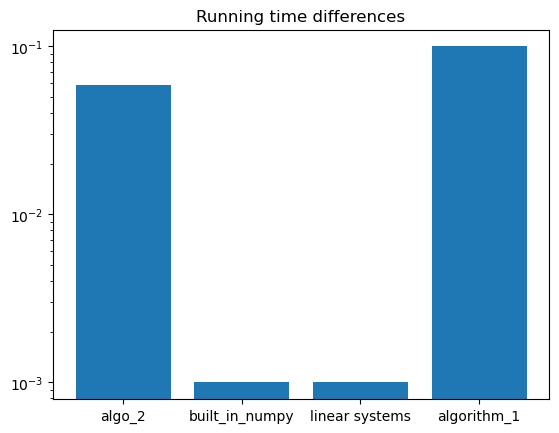

In [52]:
plt.bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], VFH_matrix_running_time)
plt.yscale('log')
plt.title('Running time differences')

Text(0.5, 1.0, 'values computed')

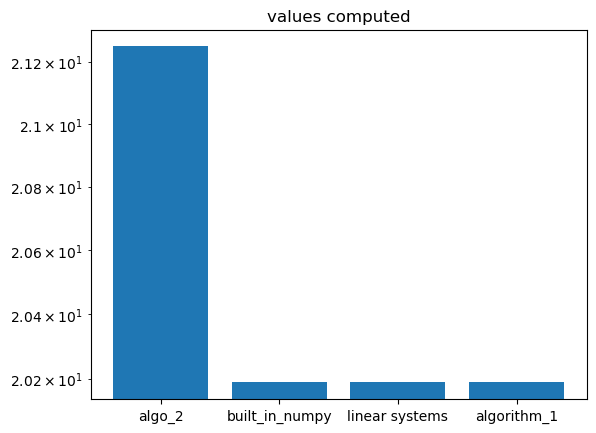

In [53]:
plt.bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], VFH_matrix_trace_value)
plt.yscale('log')
plt.title('values computed')

### Example 3: The poisson matrix

In [54]:
Poisson_matrix=Poisson_function(10) #issue!! For n=1,2 we need to do -VFH to have positive definite and for n>2 we need to find 
#another criterion than the eigenvalues as its eigenvalues are complex :( 

n=Poisson_matrix.shape[0]
Poisson_matrix_running_time=np.zeros(4)
Poisson_matrix_trace_value=np.zeros(4)

In [55]:
#running time of algo 2

start=time.time()
L=algorithm_2(Poisson_matrix,m=int(n/2),p=0.5, function=f, epsilon=tol) #for some m,p to tune 
execution_algo_2=time.time()-start 

Poisson_matrix_running_time[0]=execution_algo_2
Poisson_matrix_trace_value[0]=L[2]

In [56]:
#running time using built in numpy functions
start=time.time()
Tr_A_inv=np.trace(np.linalg.inv(VFH_matrix))
execution_built_in=time.time()-start 
Poisson_matrix_running_time[1]=execution_built_in
Poisson_matrix_trace_value[1]=Tr_A_inv

In [57]:
#running time using n linear systems

start=time.time()

Tr_A_inv=0

for i in range (n):
    e=np.zeros(n)
    e[i]=1
    Tr_A_inv+=e.T@np.linalg.solve(Poisson_matrix,e)

execution_linear=time.time()-start
Poisson_matrix_running_time[2]=execution_linear
Poisson_matrix_trace_value[2]=Tr_A_inv
    

In [58]:
#using algorithm 1
start=time.time()

Tr_A_inv=0

for i in range (n):
    e=np.zeros(n)
    e[i]=1
    Tr_A_inv+=algorithm_1(Poisson_matrix,e,function=f, maxit=50, epsilon=1e-05)

execution_algo_1=time.time()-start
Poisson_matrix_running_time[3]=execution_algo_1
Poisson_matrix_trace_value[3]=(Tr_A_inv[0]+Tr_A_inv[1])/2

Text(0.5, 1.0, 'Running time differences')

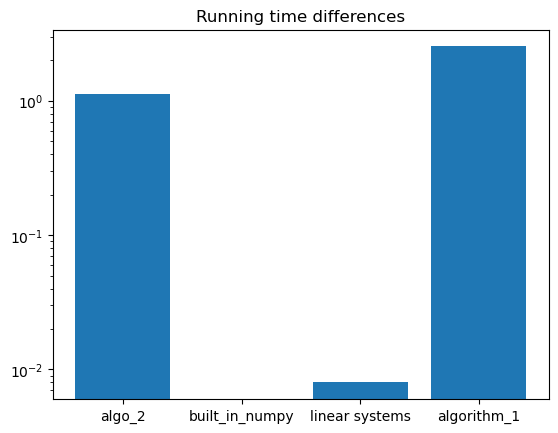

In [59]:
plt.bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], Poisson_matrix_running_time)
plt.yscale('log')
plt.title('Running time differences')

Text(0.5, 1.0, 'values computed')

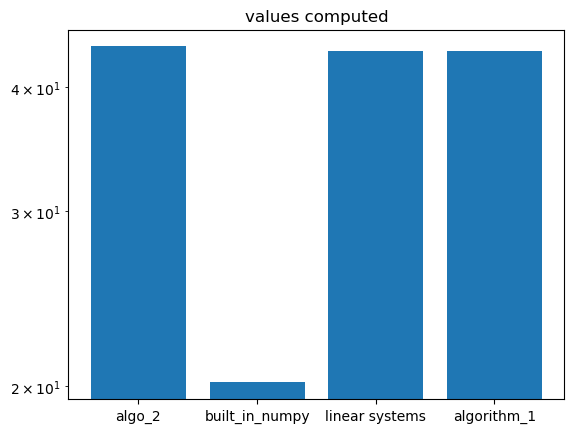

In [60]:
plt.bar(['algo_2', 'built_in_numpy', 'linear systems', 'algorithm_1'], Poisson_matrix_trace_value)
plt.yscale('log')
plt.title('values computed')

In [17]:
#the Pei matrix
alpha=2
n=4
Pei_matrix=Pei_function(alpha, n)

u = np.random.rand(n)
U, L = algorithm_1(A=Pei_matrix, u=u, function=f, maxit=200, epsilon=tol)
print("L=", L)
print("U=", U)

# exact value of u^T f(A) u:
I_ex = u.dot(np.linalg.inv(Pei_matrix)@u)
#I_ex = u.dot((A)@u)
print("exact value:", I_ex)

# check 
print("is the exact value between L and U:", I_ex<U and L<I_ex)

a = 0.0001
b = 6.0
Tolerance 1e-13 was reached at iteration 2
L= 0.16153600220772452
U= 0.16153600220772452
exact value: 0.19887453815178047
is the exact value between L and U: False


In [ ]:
#running time of algo 2

start=time.time()
E,L,U=algorithm_2(A,m,p) #for some m,p to tune 
execution_algo_2=time.time()-start 

In [4]:
#running time using built in numpy functions
A=heat_flow_matrix
start=time.time()
Tr_A_inv=np.trace(np.linalg.inv(A))
execution_built_in=time.time()-start 
print('execution time', execution_built_in)

execution time 0.0012359619140625


In [6]:
#solving n linear equations

#(Armelle: in my opinion, when they say compute trace(inv(A)) using n linear equations, they mean computing 
#e_i.T inv(A) e_i for i in {1,...,n} )

start=time.time()
n=A.shape[0]

trace=0
for i in range(n):
    e=np.zeros(n)
    e[i]=1
    trace+=e.T@np.linalg.inv(A)@e
execution_linear_equations=time.time()-start 

print('execution time', execution_linear_equations)

execution time 0.03495073318481445


In [ ]:
#using algorithm 1

n=A.shape[0]
start=time.time()
trace=0
for i in range (n):
    trace+= #output of algo 1 (I guess here also parameter values to tune)
execution_algo_1=time.time()-start 